In [4]:
import pandas as pd

data = pd.read_csv("../data/fraud.csv")
data.head()

,transaction_id,amount,transaction_hour,merchant_category,foreign_transaction,location_mismatch,device_trust_score,velocity_last_24h,cardholder_age,is_fraud
0,1,84.47,22,Electronics,0,0,66,3,40,0
1,2,541.82,3,Travel,1,0,87,1,64,0
2,3,237.01,17,Grocery,0,0,49,1,61,0
3,4,164.33,4,Grocery,0,1,72,3,34,0
4,5,30.53,15,Food,0,0,79,0,44,0


In [5]:
data.isna().sum()

transaction_id         0
amount                 0
transaction_hour       0
merchant_category      0
foreign_transaction    0
location_mismatch      0
device_trust_score     0
velocity_last_24h      0
cardholder_age         0
is_fraud               0
dtype: int64

In [6]:
data.duplicated().sum()

np.int64(0)

In [7]:
data.describe()

,transaction_id,amount,transaction_hour,foreign_transaction,location_mismatch,device_trust_score,velocity_last_24h,cardholder_age,is_fraud
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,175.949849,11.593300,0.097800,0.085700,61.798900,2.008900,43.468700,0.015100
std,2886.89568,175.392827,6.922708,0.297059,0.279935,21.487053,1.432559,14.979147,0.121957
min,1.00000,0.000000,0.000000,0.000000,0.000000,25.000000,0.000000,18.000000,0.000000
25%,2500.75000,50.905000,6.000000,0.000000,0.000000,43.000000,1.000000,30.000000,0.000000
50%,5000.50000,122.095000,12.000000,0.000000,0.000000,62.000000,2.000000,44.000000,0.000000
75%,7500.25000,242.480000,18.000000,0.000000,0.000000,80.000000,3.000000,56.000000,0.000000
max,10000.00000,1471.040000,23.000000,1.000000,1.000000,99.000000,9.000000,69.000000,1.000000


In [8]:
data.velocity_last_24h.unique()

array([3, 1, 0, 2, 4, 7, 5, 6, 8, 9])

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   transaction_id       10000 non-null  int64  
 1   amount               10000 non-null  float64
 2   transaction_hour     10000 non-null  int64  
 3   merchant_category    10000 non-null  object 
 4   foreign_transaction  10000 non-null  int64  
 5   location_mismatch    10000 non-null  int64  
 6   device_trust_score   10000 non-null  int64  
 7   velocity_last_24h    10000 non-null  int64  
 8   cardholder_age       10000 non-null  int64  
 9   is_fraud             10000 non-null  int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 781.4+ KB


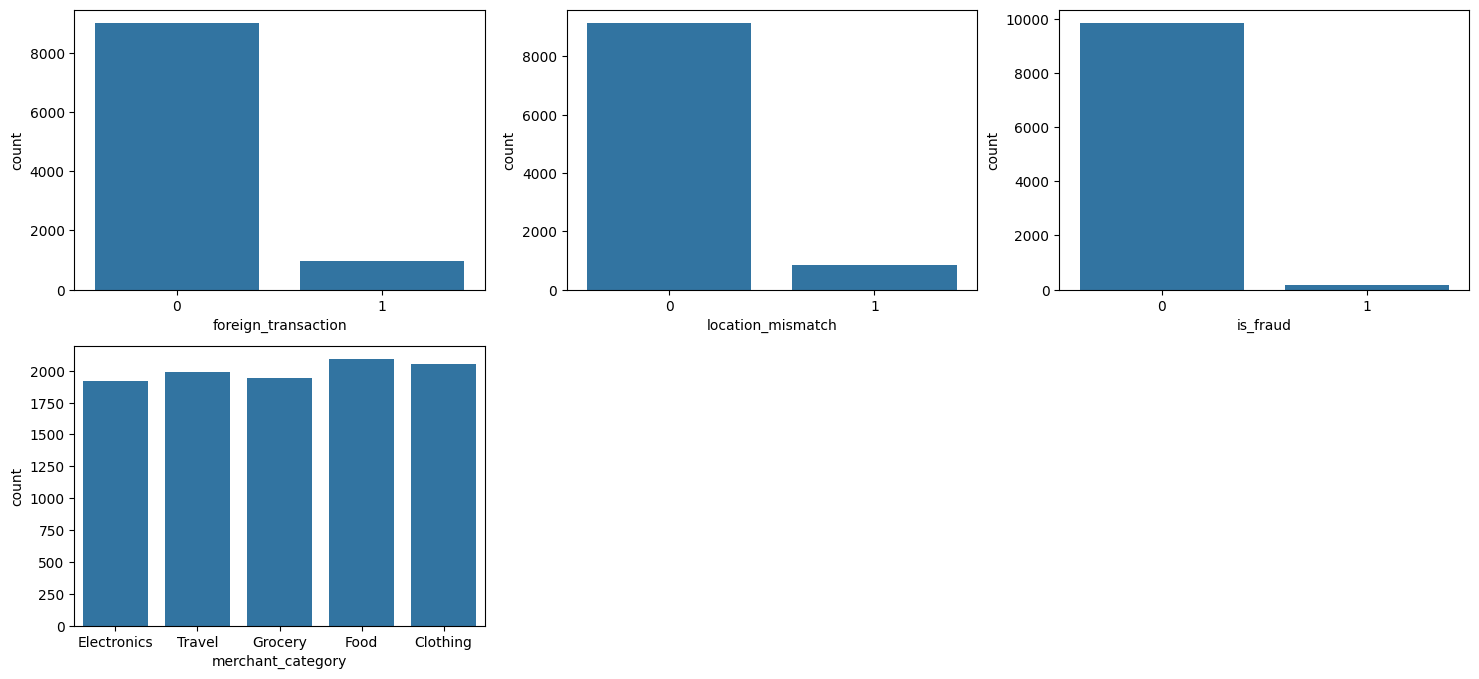

In [10]:
import math
import matplotlib.pyplot as plt
import seaborn as sns

cols = ["foreign_transaction", "location_mismatch", "is_fraud", "merchant_category"]

num_cols = len(cols)
n_cols = 3
n_rows = math.ceil(num_cols / n_cols)

fig, axes = plt.subplots(ncols=n_cols, nrows=n_rows, figsize=(18, n_rows * 4))
axes = axes.flatten()

for i, col in enumerate(cols):
    sns.countplot(x=col, data=data, ax=axes[i])
    plt.title(col)
    
for j in range (i + 1, len(axes)):
    fig.delaxes(axes[j])

In [11]:
data.location_mismatch.value_counts(), data.is_fraud.value_counts(), data.foreign_transaction.value_counts()

(location_mismatch
 0    9143
 1     857
 Name: count, dtype: int64,
 is_fraud
 0    9849
 1     151
 Name: count, dtype: int64,
 foreign_transaction
 0    9022
 1     978
 Name: count, dtype: int64)

There are quantity unbalance between some columns we wont touch them

<Axes: >

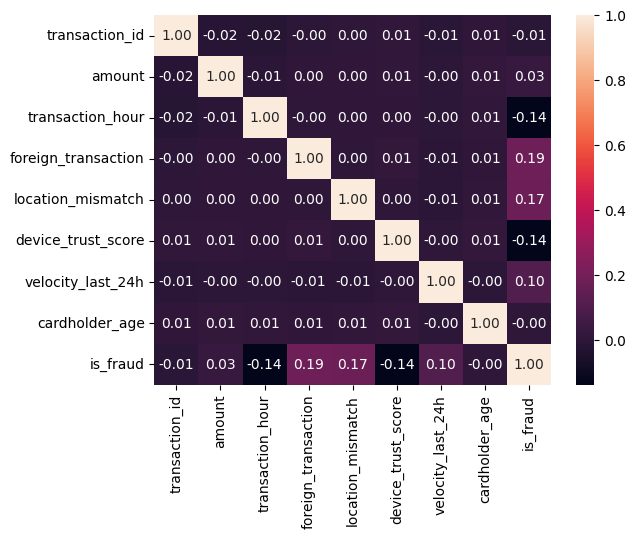

In [12]:
sns.heatmap(data.corr(numeric_only=True), annot=True, fmt=".2f")

In [13]:
data.columns

Index(['transaction_id', 'amount', 'transaction_hour', 'merchant_category',
       'foreign_transaction', 'location_mismatch', 'device_trust_score',
       'velocity_last_24h', 'cardholder_age', 'is_fraud'],
      dtype='object')

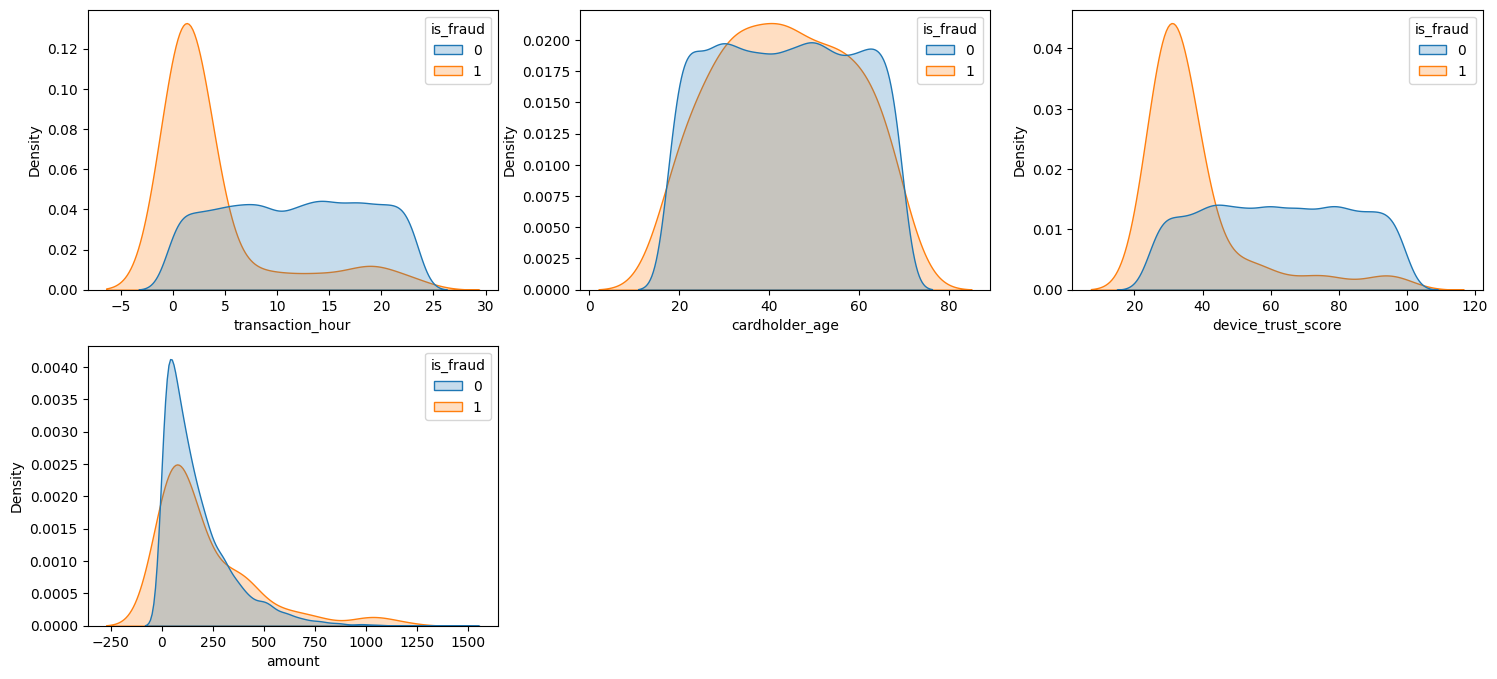

In [14]:
cols = ["transaction_hour", "cardholder_age", "device_trust_score", "amount"]

num_cols = len(cols)
n_cols = 3
n_rows = math.ceil(num_cols / n_cols)

fig, axes = plt.subplots(ncols=n_cols, nrows=n_rows, figsize=(18, n_rows * 4))
axes = axes.flatten()

for i, col in enumerate(cols):
    sns.kdeplot(x=col, data=data, ax=axes[i], fill=True, color="green", hue="is_fraud", common_norm=False)
    plt.title(col)
    
for j in range (i + 1, len(axes)):
    fig.delaxes(axes[j])

There is skewness in "amount" column

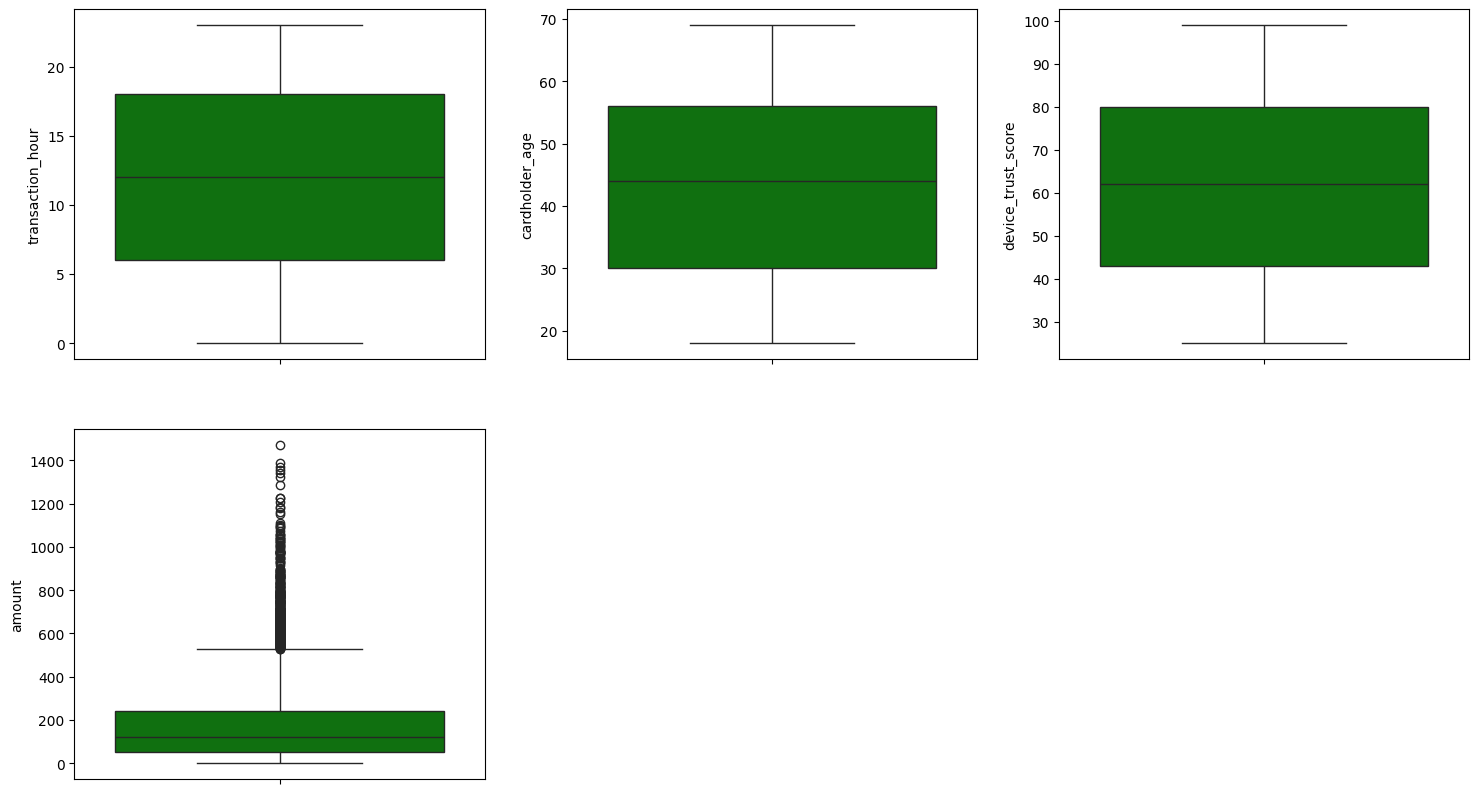

In [15]:
cols = ["transaction_hour", "cardholder_age", "device_trust_score", "amount"]

num_cols = len(cols)
n_cols = 3
n_rows = math.ceil(num_cols / n_cols)

fig, axes = plt.subplots(ncols=n_cols, nrows=n_rows, figsize=(18, n_rows * 5))
axes = axes.flatten()

for i, col in enumerate(cols):
    sns.boxplot(y=col, data=data, ax=axes[i], fill=True, color="green")
    plt.title(col)
    
for j in range (i + 1, len(axes)):
    fig.delaxes(axes[j])

There are outliers in "amount" column but we wont touch them since they could be the fraud case

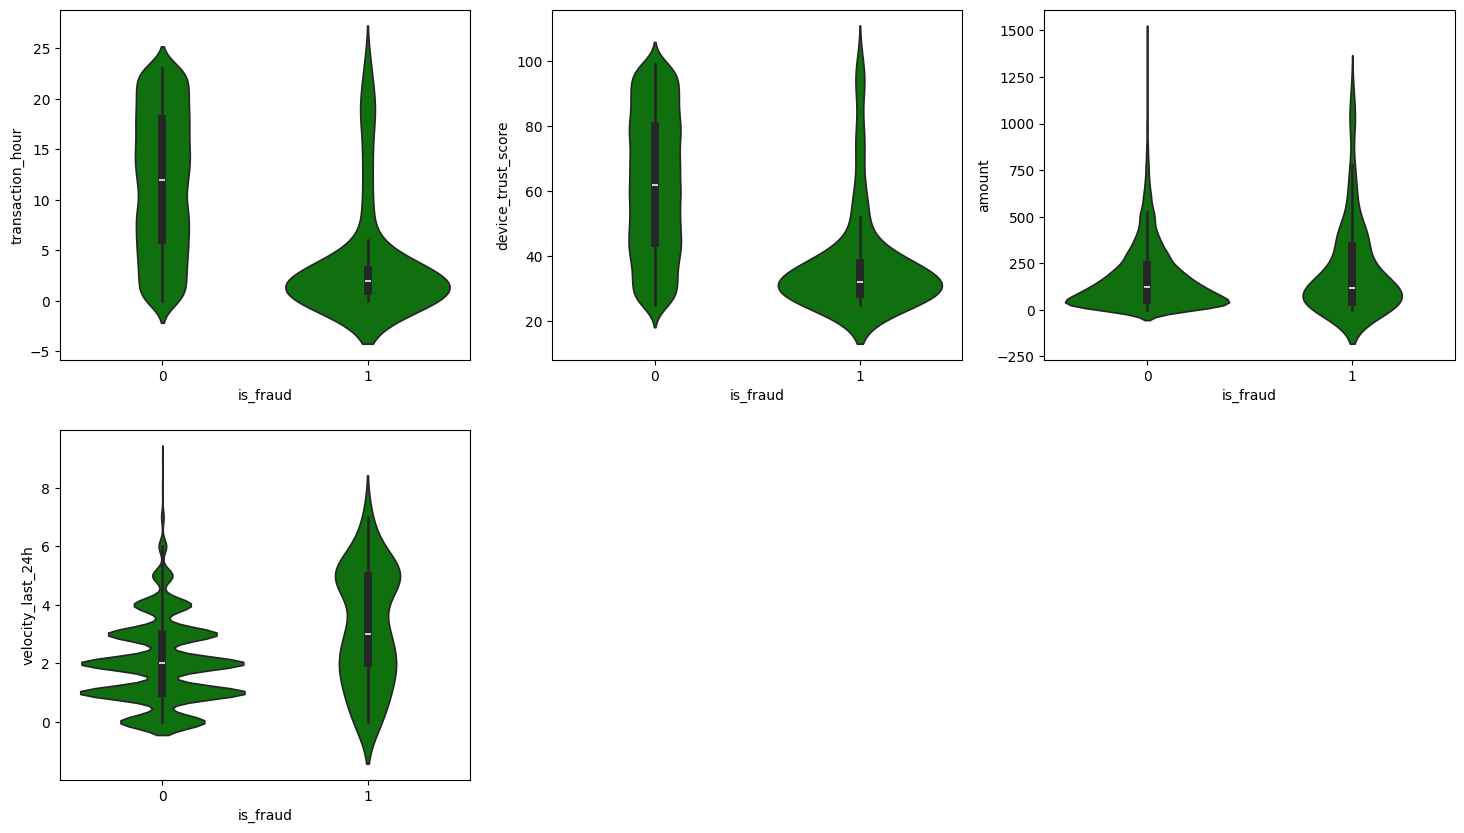

In [16]:
cols = ["transaction_hour", "device_trust_score", "amount", "velocity_last_24h"]

num_cols = len(cols)
n_cols = 3
n_rows = math.ceil(num_cols / n_cols)

fig, axes = plt.subplots(ncols=n_cols, nrows=n_rows, figsize=(18, n_rows * 5))
axes = axes.flatten()

for i, col in enumerate(cols):
    sns.violinplot(x="is_fraud", y=col, data=data, ax=axes[i], fill=True, color="green")
    plt.title(col)
    
for j in range (i + 1, len(axes)):
    fig.delaxes(axes[j])

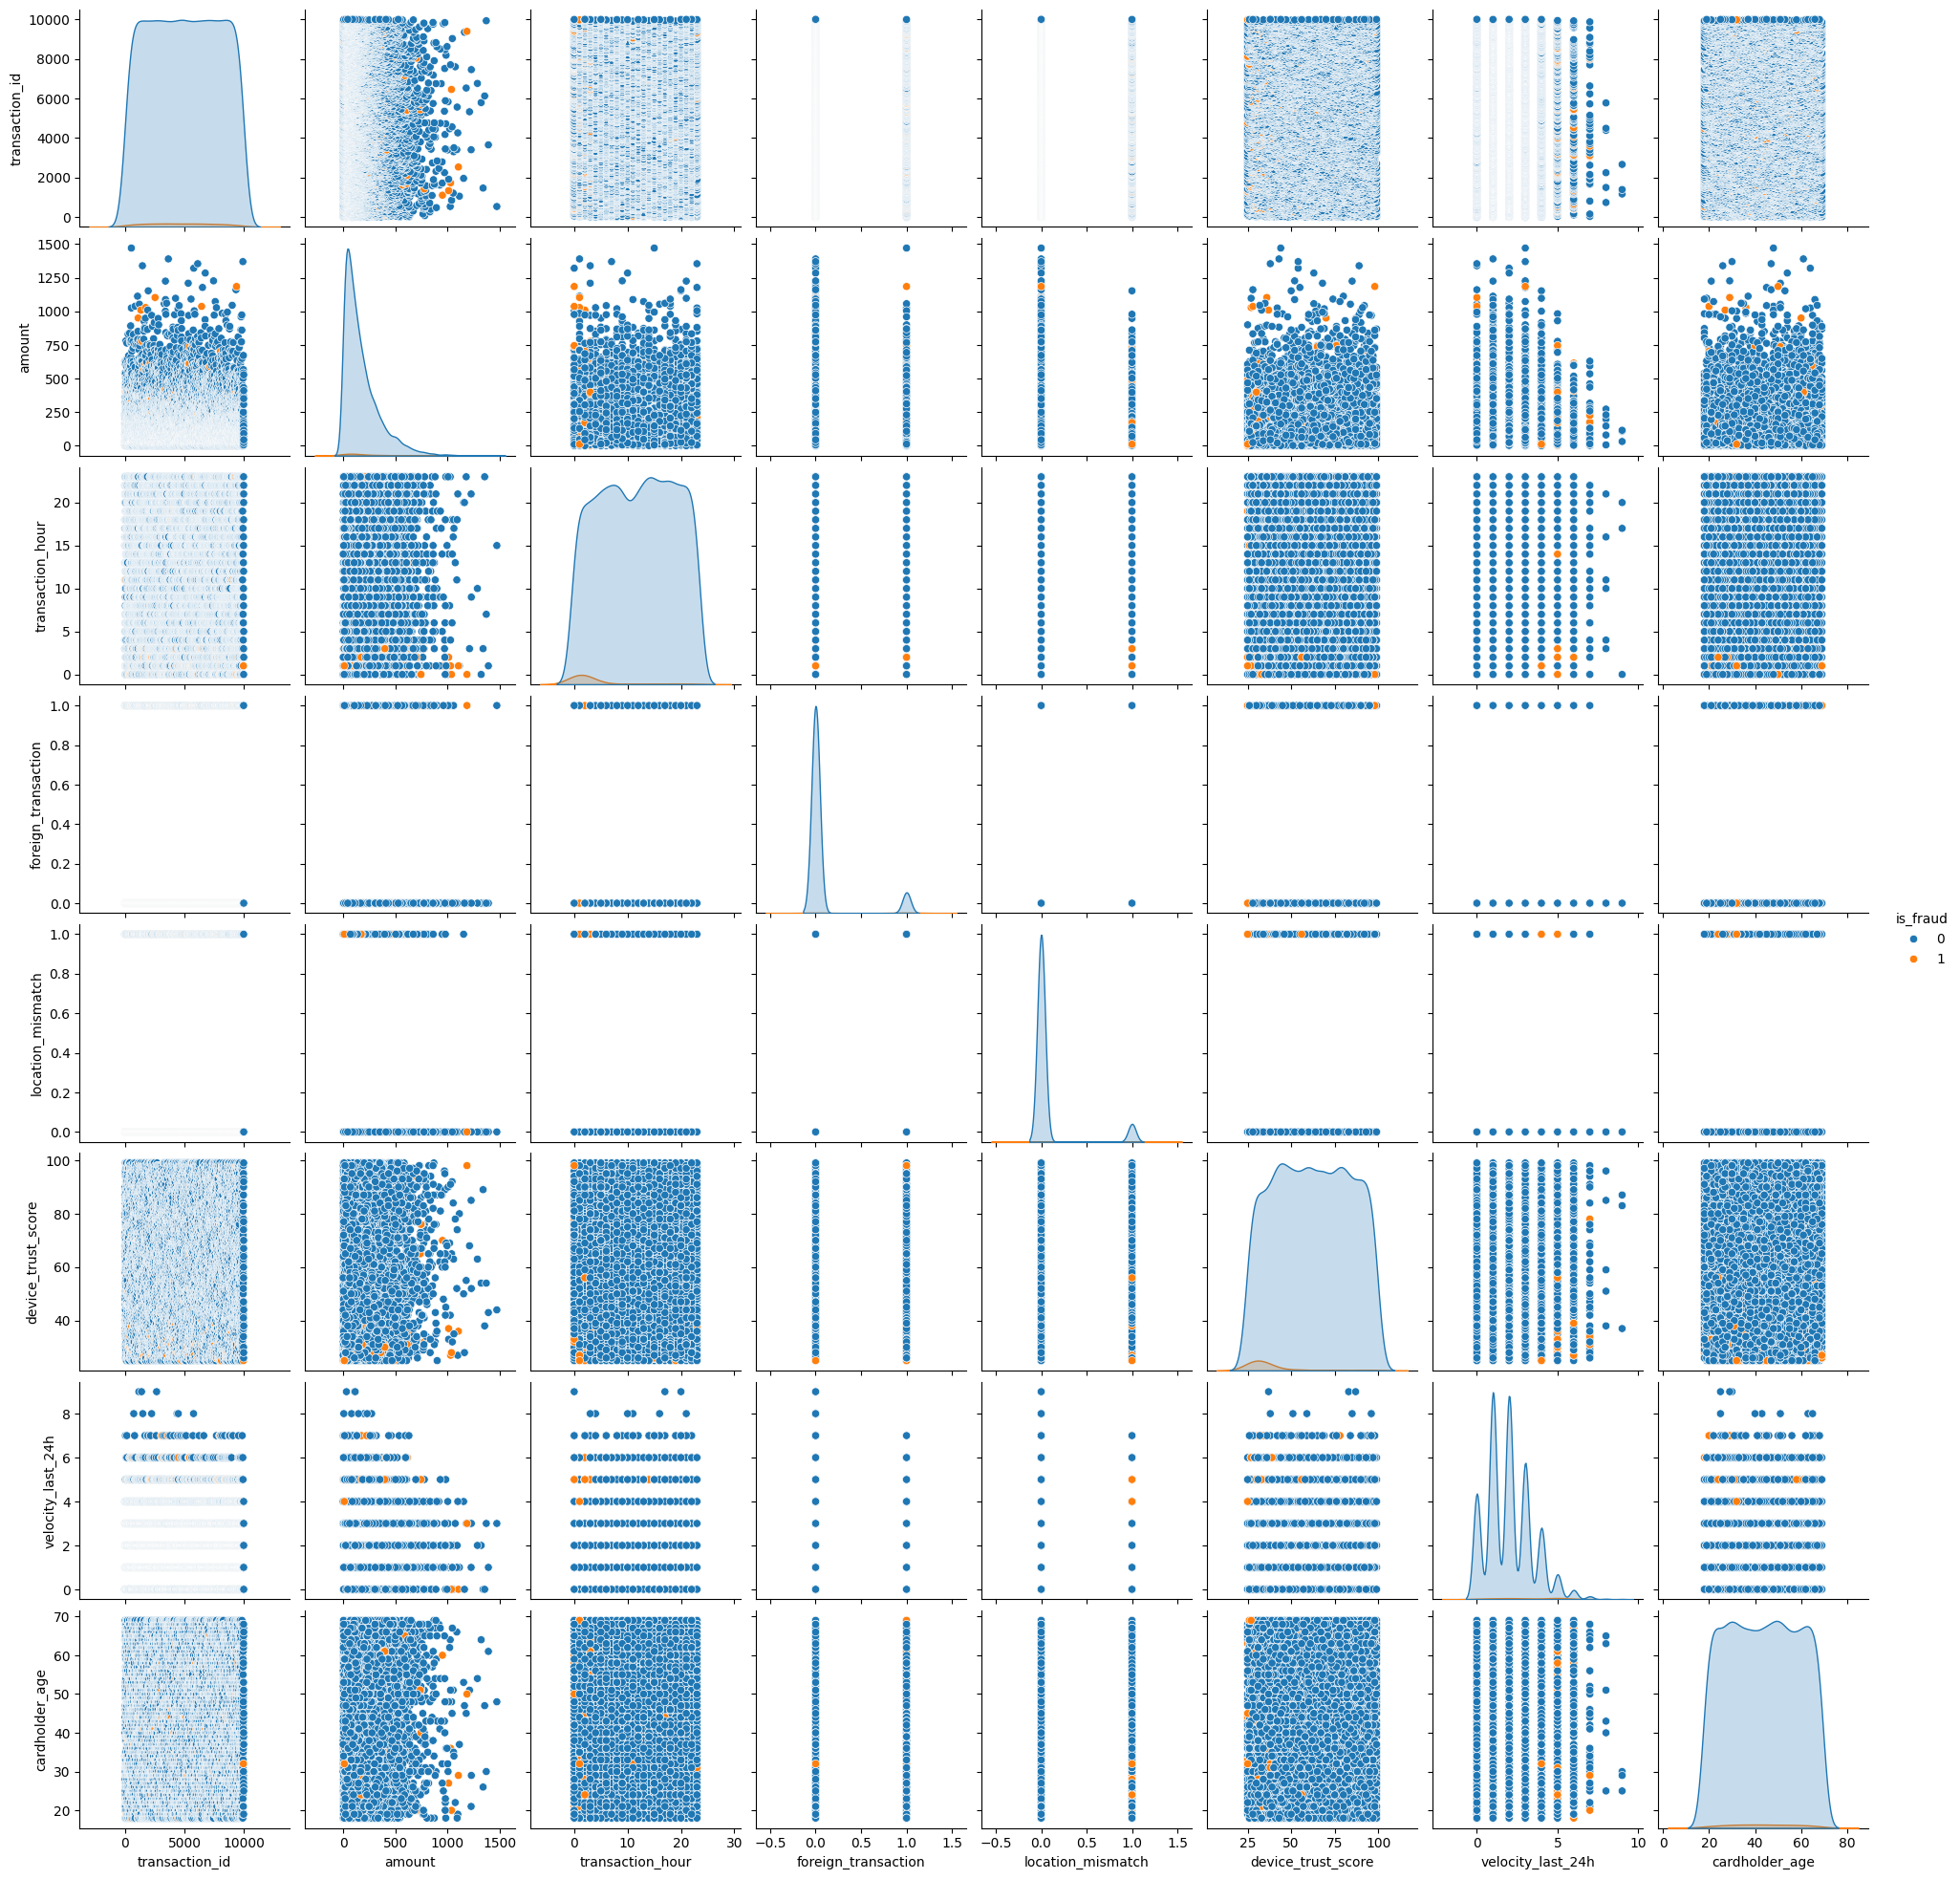

In [17]:
sns.pairplot(data=data, hue="is_fraud")

/var/folders/15/sxkbvdhs4759nsqxq03zn9kc0000gn/T/ipykernel_4368/578018438.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='merchant_category', y='is_fraud', data=data, palette='Reds_r')


<Axes: xlabel='merchant_category', ylabel='is_fraud'>

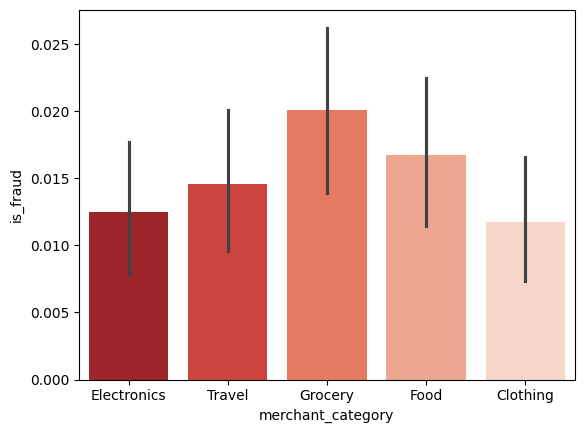

In [18]:
import seaborn as sns
sns.barplot(x='merchant_category', y='is_fraud', data=data, palette='Reds_r')